In [1]:
import pandas as pd
from sdv.single_table import TVAESynthesizer

from domias.evaluator import evaluate_performance
from domias.models.generator import GeneratorInterface
from domias.models.ctgan import CTGAN



from scipy import stats
from scipy.stats import multivariate_normal


import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing, fetch_covtype, load_digits

import warnings
warnings.filterwarnings("ignore")

[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


In [4]:
#Read in UCI dataset
df_uci = pd.read_csv(r'C:\Users\jordy\OneDrive\MSc_Python\Individual_Project\Data\UCI_Credit_Card.csv')

#convert dataframe to array
arr_uci = np.array(df_uci.iloc[:, 1:])

In [5]:
df_uci

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [6]:
#Define data loader
def get_dataset() -> np.ndarray:
    def data_loader() -> np.ndarray:
        scaler = StandardScaler()
        X =arr_uci
        np.random.shuffle(X)
        return scaler.fit_transform(X)

    return data_loader()

p_G_evaluated
[1.79727833e-15 1.17425286e-02 2.61361988e-09 ... 2.11728776e-34
 2.64829124e-04 3.30146876e-02]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.074802 -1.234323  0.187723 -1.055400  1.932598  1.793934  0.112037   
1   -0.492631  0.809381  0.185251  0.858431 -0.421963  0.014655  0.114776   
2    1.322680  0.809379  0.185835  0.860898 -0.732807  0.014841  0.115472   
3   -1.013363  0.809652  0.186182  0.861084 -1.293706  0.015258  0.113657   
4   -0.791640  0.810161  0.186070  0.861521 -1.378469  0.014932  0.108768   
..        ...       ...       ...       ...       ...       ...       ...   
495  1.029064  0.810043 -1.071669 -1.062071  1.763687 -1.761421 -1.558876   
496 -1.146450  0.809758  0.183098  0.857971 -0.636703  0.904966  1.788397   
497 -0.967553  0.810161  0.191351  0.857281 -1.562594  0.014851  0.11

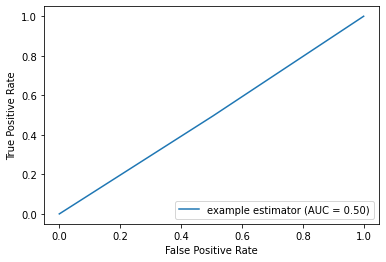

fpr: [0.     0.5046 1.    ]
tpr: [0.     0.4954 1.    ]
p_G_evaluated
[3.14633258e-12 8.14829987e-06 7.51316825e-10 ... 9.00100716e-17
 5.17742656e-07 4.59895976e-06]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -0.770749  0.809297  0.187401 -1.056644  1.955468  0.014702  0.111444   
1   -0.919067  0.809429 -1.079573  0.858456 -0.406379 -0.875219 -0.722227   
2   -0.727190  0.809495  0.186688 -1.056558  0.565701  0.014738  0.112687   
3    0.319187  0.809691 -1.078799 -1.056179 -0.082087 -1.763357 -1.557895   
4   -0.763876  0.810161  0.185741  0.859074 -0.906053  0.014982  0.110957   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.986623  0.810152  0.188223  0.857447 -0.453952  0.015289  0.111200   
496 -1.145685  0.809880  0.184062 -1.056674 -1.177093  1.795009  1.784095   
497 -1.071620

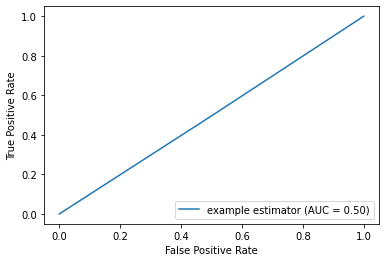

fpr: [0.     0.5021 1.    ]
tpr: [0.     0.4979 1.    ]
p_G_evaluated
[4.52612267e-11 5.12499156e-05 1.12365392e-09 ... 1.94347062e-10
 9.09016910e-07 9.85141423e-07]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -0.777217  0.809367  0.186182 -1.056635  1.870040  1.794372  1.780887   
1    0.430241  0.809573 -1.079685  0.858444 -0.474735 -1.764843 -1.555897   
2   -0.204515  0.809590  0.185869 -1.056316  1.272120  1.793802  0.112789   
3    0.312051  0.809860 -1.079376  0.859120 -0.856975  0.904827 -1.556804   
4    1.154704  0.810161 -1.079259  0.859313 -0.937788 -0.874388 -0.724936   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.213794  0.810161 -1.077602  0.857222 -0.519195  0.905541 -1.558876   
496  0.131737  0.809943 -1.080565  0.858392 -0.700856  0.904326 -1.555469   
497 -0.679775

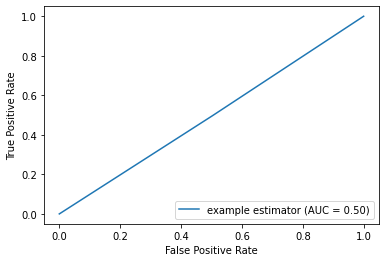

fpr: [0.     0.5032 1.    ]
tpr: [0.     0.4968 1.    ]
p_G_evaluated
[8.91697638e-09 6.48938982e-06 1.84722915e-09 ... 4.24679595e-13
 3.36402379e-05 1.67428363e-07]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.121068 -1.234323  0.186098  0.858880  0.278652  0.015140  0.111539   
1    0.419334  0.809397 -1.079945  0.858439 -0.430271 -0.875452 -0.722202   
2    1.246074  0.809425  0.185607 -1.056937  0.528846 -1.764595 -1.555733   
3   -1.015824  0.809573  0.185766  0.859211  0.526315  1.795599  0.111859   
4   -0.301625  0.810161  0.185985 -1.055720  0.325298  0.015157  0.110815   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.213794  0.810038 -1.077746  0.857438 -0.606496 -0.873247 -0.724458   
496 -1.128647 -1.234323  0.184838 -1.057003  1.480117  0.015248  0.112247   
497 -1.047780

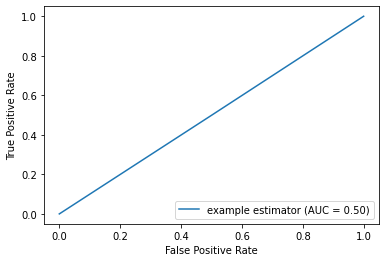

fpr: [0.     0.5006 1.    ]
tpr: [0.     0.4994 1.    ]
p_G_evaluated
[6.80888326e-09 1.16659990e-05 4.70547464e-10 ... 7.63289911e-17
 3.75137543e-08 1.47168006e-07]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    0.111560  0.809315  0.185842  0.858947 -0.497189  1.793699  0.111448   
1    0.437658  0.809463 -1.080001  0.858482  0.202459  0.902706 -1.556415   
2   -0.765623  0.809443 -1.079736  0.859150 -1.282584  0.014793  0.112452   
3    0.314392  0.809739 -1.079452  0.859305 -0.806317 -1.762782 -1.558015   
4    0.128531  0.810161 -1.079860  0.859491 -1.422036  0.015079  0.110736   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.213794  0.810068  1.453507 -1.058586  1.749932  2.691038  1.780300   
496  0.100961 -1.234323 -1.081120 -1.057485  2.009752  0.904912 -1.557414   
497 -1.028697

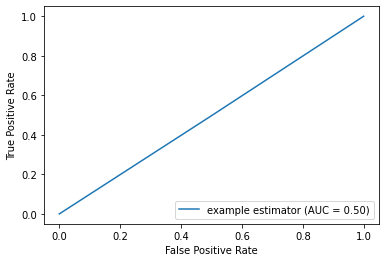

fpr: [0.     0.5016 1.    ]
tpr: [0.     0.4984 1.    ]
p_G_evaluated
[4.98592225e-13 1.33137868e-06 4.40500201e-08 ... 7.47046893e-10
 2.26002544e-06 5.36826177e-09]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    2.207283  0.809372 -1.078602  0.858807  0.217047 -1.763781 -1.558876   
1   -0.456065  0.809593  0.185752 -1.057404  2.097297  1.793432  1.784215   
2    0.127233  0.809543  0.185802 -1.056528  1.301540 -0.874713 -0.722096   
3   -1.023317  0.809830  0.185912 -1.056378  1.166490  0.015247  0.111727   
4    2.200425 -1.231884 -1.079159  0.859387 -1.002291  0.015115  0.110755   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.957672  0.810161  0.186908  0.857619 -0.648143  0.015582  0.111059   
496 -0.802348  0.809992  0.185821 -1.057240 -1.110175 -0.874397 -0.722856   
497 -1.069170

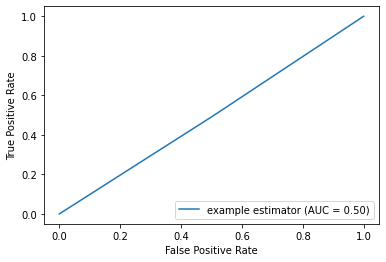

fpr: [0.     0.5047 1.    ]
tpr: [0.     0.4953 1.    ]
p_G_evaluated
[8.13944558e-12 1.22803441e-04 2.52716713e-10 ... 1.28423112e-30
 2.84909142e-07 2.03419790e-03]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -0.839931  0.809252  0.187453  0.859952 -1.085340  0.014954  0.110764   
1    0.432315  0.809392  0.184638 -1.056995 -0.404400  0.014637  0.114314   
2   -0.716462  0.809459 -1.079369 -1.054110 -0.717274  0.014789  0.115631   
3    1.415758  0.809720 -1.079222  0.861803 -0.810401  0.015142  0.112517   
4   -0.785345  0.810161  0.185461  0.861962 -0.941803  0.904566  1.765026   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.014389  0.810076  0.189790  0.854211 -0.480403  0.015594  0.109191   
496 -1.157346 -1.234323  0.182600 -1.057454 -1.169349  0.905002  1.788275   
497  0.200888

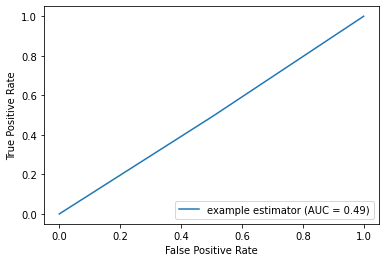

fpr: [0.     0.5051 1.    ]
tpr: [0.     0.4949 1.    ]
p_G_evaluated
[5.20279801e-10 3.73729551e-04 1.06720519e-08 ... 1.45198604e-18
 5.07703939e-06 3.46872257e-05]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    0.116848  0.809235 -1.078923  0.859043 -0.445754 -0.874826 -0.723892   
1    1.680106  0.809423  0.185508  0.858604 -0.406703 -0.875305 -0.721788   
2   -1.092588  0.809517  0.185834 -1.056058 -1.242892  0.905088  1.785199   
3    0.278410  0.809524 -1.079202 -1.057861 -0.780395  0.904793 -1.557560   
4    1.171063  0.810161  0.185409  0.859471 -0.885524 -1.762280 -1.558876   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.427429  0.810127  0.186887 -1.057975 -0.453976  0.015543  0.111314   
496  1.176238  0.809799  0.184909 -1.056800  1.591097  0.015127  0.112346   
497 -1.062182

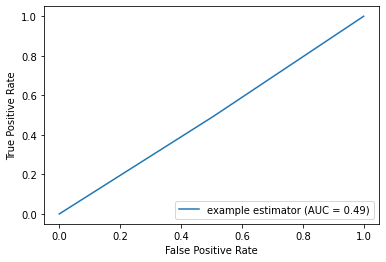

fpr: [0.     0.5064 1.    ]
tpr: [0.     0.4936 1.    ]
p_G_evaluated
[4.82730690e-12 8.98900880e-06 5.25196050e-14 ... 4.49532648e-15
 6.97452951e-11 1.78412539e-05]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    1.188553  0.809417 -1.077875 -1.056229  0.283291 -1.763781 -1.558876   
1    0.443124  0.809605  0.185146 -1.056982  1.037935 -1.764843 -1.556770   
2   -1.111755  0.809509  0.185516  0.859194 -1.272977  0.904543  1.785126   
3    0.247227  0.809863  0.185714 -1.055821 -0.774622 -0.873834 -0.722869   
4    1.315345  0.810161 -1.078389 -1.055774  1.093945  1.794371  0.110787   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.940127  0.810161  0.190307 -1.058165  0.239695  0.015576  0.111177   
496 -1.164496  0.809930  0.182430  0.858623 -0.655136  0.015094  0.112115   
497  0.221516

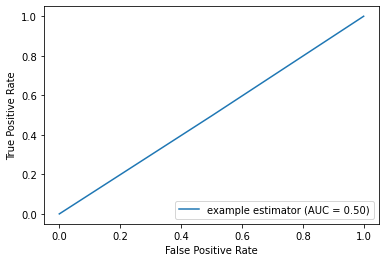

fpr: [0.     0.5022 1.    ]
tpr: [0.     0.4978 1.    ]
p_G_evaluated
[7.66584205e-11 3.80852728e-05 1.27679893e-09 ... 3.30350158e-15
 4.30169872e-06 3.79518709e-06]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    0.017838  0.809263 -1.078269  0.859260 -0.413448  0.903977 -0.723610   
1    1.780682  0.809433 -1.079233 -1.056936  1.064708 -0.875463 -0.721725   
2   -1.152162  0.809402  0.186019  0.859383 -0.828701  1.793501  1.786189   
3   -0.633508  0.809716  0.185956  0.859445 -0.805450  0.015237  0.112079   
4   -0.840515  0.810161  0.185834  0.859686 -0.601417  0.905594  1.779017   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.044094  0.810119 -1.076357  0.858025 -1.129766  1.796301  2.617909   
496 -1.119670  0.809812  0.185104  0.858860 -1.223100  0.015174  0.112361   
497  1.438226

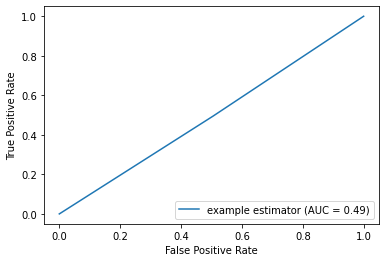

fpr: [0.     0.5052 1.    ]
tpr: [0.     0.4948 1.    ]
p_G_evaluated
[2.39985665e-11 1.59371725e-04 2.62608551e-09 ... 1.36156855e-13
 7.18472002e-06 6.99417095e-07]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.213794  0.809292  0.186135  0.858737 -1.051058  0.905364  1.781880   
1   -0.450539  0.809446  0.185528  0.858382  0.225127  0.014695  0.112395   
2   -1.137770  0.809464 -1.079312  0.859151 -1.253401 -0.874324 -0.720833   
3   -1.075556 -1.234323  0.185885 -1.056348  1.228039  0.905861  1.783117   
4   -1.126654  0.810161  0.185715  0.859239 -1.352394  0.015004  0.110901   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.874836  0.810148  0.186948  0.857197 -0.454910  1.798041  1.780288   
496 -1.189347 -1.234323  1.448282 -1.057132  1.516067  0.905811  1.784388   
497  0.264448

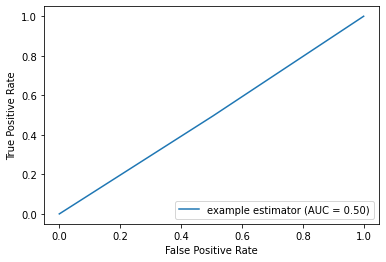

fpr: [0.     0.5046 1.    ]
tpr: [0.     0.4954 1.    ]
p_G_evaluated
[1.58080417e-13 3.58336227e-05 9.72251855e-09 ... 6.11763336e-17
 2.40377897e-05 4.24835789e-06]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.128730  0.809303 -1.078637  0.859128 -1.078267  0.014846  0.111468   
1   -0.895099  0.809405  0.185587 -1.057074  1.845632  0.014576  0.112423   
2   -1.072900  0.809477 -1.079528  0.859194 -1.291549  0.014693  0.112376   
3    0.281163  0.809752 -1.079482  0.859229 -0.807701 -1.763107 -1.558814   
4   -1.151686 -1.232305  1.451210 -1.056496  1.269227  1.795349  1.777261   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.960717 -1.233928  0.186881 -1.058146  0.228250  3.159996  2.815605   
496  2.222173 -1.234323  1.447430 -1.057192  1.984302  0.014812  0.111905   
497 -0.328298

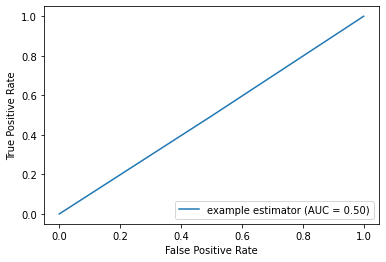

fpr: [0.     0.5024 1.    ]
tpr: [0.     0.4976 1.    ]
p_G_evaluated
[4.99921735e-09 2.51728349e-04 6.20954907e-11 ... 1.61273574e-29
 5.11455279e-07 6.72999072e-02]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    0.084258  0.809360  0.187435 -1.054636 -0.375667  0.015013  0.110744   
1   -0.917045  0.809502  0.185025  0.858629 -0.435817  0.014598  0.114168   
2   -0.673177  0.809681  0.185232  0.861939 -1.276454  0.014774  0.114909   
3    0.301586  0.809922 -1.079603 -1.053389 -0.792229  0.904405 -1.555709   
4   -0.301643  0.810161  0.185580  0.862326 -0.928798  0.015073  0.108086   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.213794 -1.233642  0.190113  0.854825 -1.116525  0.906485  1.770548   
496  0.105854  0.809967 -1.084217 -1.056830 -0.623542 -1.762383 -1.550928   
497 -1.072587

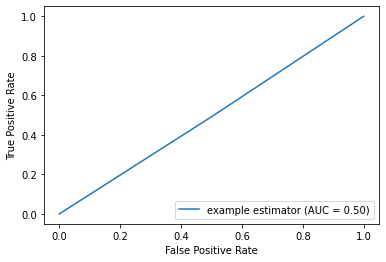

fpr: [0.     0.5043 1.    ]
tpr: [0.     0.4957 1.    ]
p_G_evaluated
[2.80361400e-12 5.20410473e-05 1.81384129e-09 ... 3.69016770e-11
 1.10150851e-05 5.67464209e-06]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    0.126438  0.809178  0.186621 -1.057008  1.138374 -0.875087 -0.723909   
1   -0.487877  0.809383  0.185428 -1.057208  1.822082  0.014474  0.112540   
2   -1.132656  0.809302  1.452099 -1.058144  1.411925  0.014734  0.112637   
3    0.253649  0.809676  0.185098 -1.056591 -0.094065  0.905494  1.784632   
4   -1.120209  0.810161  0.185444 -1.056323 -0.197528 -0.874572  0.110909   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.059083  0.810123 -1.075329  0.857327 -0.518696 -0.873724 -0.724332   
496  0.154696  0.809366  0.183499  0.858603 -0.599479  0.014933  0.112703   
497  1.397630

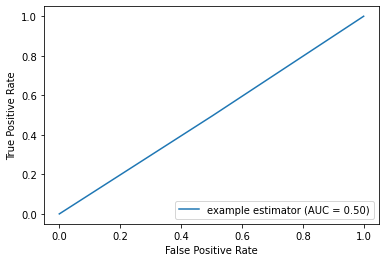

fpr: [0.     0.5033 1.    ]
tpr: [0.     0.4967 1.    ]
p_G_evaluated
[5.14331815e-10 1.07498315e-04 5.63894843e-10 ... 2.46511987e-25
 1.29642851e-05 1.27659556e-06]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -0.337969  0.809389 -1.078373  0.859226 -0.645416  0.014859  0.111616   
1   -0.053816  0.809537 -1.079230  0.858816 -0.669949  0.014453  0.112341   
2   -1.098578  0.809510  0.185998 -1.056134  1.261382  0.014830  0.112451   
3   -0.996518  0.809838  0.186073 -1.056199  1.264276  0.015161  0.111933   
4   -1.213794 -1.231741  0.186402 -1.074248  0.949762  0.015078  0.114206   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.938334  0.810161  0.186946  0.857700 -0.516013  0.906214 -1.558876   
496  0.076286  0.809935 -1.080650  0.858593 -0.696641 -0.874245 -0.722671   
497 -0.658895

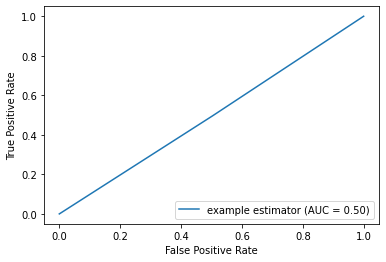

fpr: [0.     0.5037 1.    ]
tpr: [0.     0.4963 1.    ]
p_G_evaluated
[4.57600013e-11 2.25195524e-05 2.59987234e-08 ... 6.46780846e-20
 2.71157409e-07 1.62945282e-05]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.213794 -1.234323  0.186517 -1.055957  1.969910  1.794269  0.111404   
1   -0.020079  0.809454  0.185639 -1.056817  0.284240  0.014562  0.112453   
2    0.186339  0.809453  0.185758 -1.055940 -0.031167  0.014872  0.112584   
3    1.455918  0.809701  0.185889  0.859386 -0.787996  0.015203  0.111974   
4    1.149702  0.810161 -1.079365  0.859387 -0.891104  0.015059  0.110965   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.209854  0.810083  0.186954 -1.057899 -0.465005  0.906822  1.779945   
496 -1.106225  0.809839  0.184990  0.858680 -1.200994  0.015283  0.112147   
497  0.840232

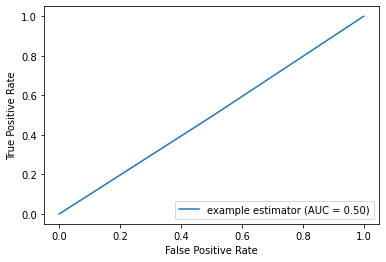

fpr: [0.     0.5038 1.    ]
tpr: [0.     0.4962 1.    ]
p_G_evaluated
[9.88229885e-14 6.79828244e-06 7.78505786e-10 ... 5.22901601e-16
 5.55131268e-07 4.70962037e-08]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    0.128238  0.809290 -1.078395 -1.056623  0.988958 -1.764328 -1.558876   
1   -0.915779  0.809425 -1.079503  0.858547 -0.466458 -0.875604 -0.721975   
2    0.169031  0.809374 -1.079157  0.859058 -0.415225  0.903863 -1.555500   
3    1.416996  0.809717 -1.078914  0.859333 -0.792546  0.015057  0.112008   
4    0.087034  0.810161  0.185756  0.859247 -0.834337 -0.874432 -0.725149   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.885815  0.810084  0.186990  0.857470 -0.466310  0.015431  0.111177   
496 -0.805036  0.809790  0.185162  0.858461 -0.294734  0.015107  0.112284   
497 -0.679477

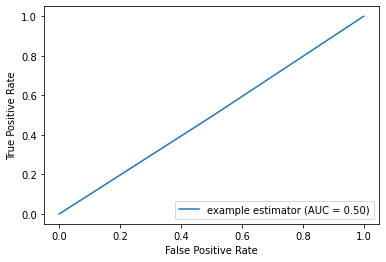

fpr: [0.     0.5038 1.    ]
tpr: [0.     0.4962 1.    ]
p_G_evaluated
[3.68444364e-14 9.76076054e-06 5.55928865e-09 ... 6.24559587e-28
 9.53624596e-06 1.59580668e-07]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.153882 -1.234323  0.186194  0.859078  0.266830  0.014823  0.111762   
1    0.380644  0.809642  0.185782 -1.057200  1.909959 -0.875471 -0.722174   
2    0.118610  0.809506  0.185690  0.859238 -0.139952  0.014895  0.112580   
3    1.472787  0.809861 -1.079237 -1.056071  1.254303 -1.762889 -1.557473   
4   -0.771950  0.810161  0.185775 -1.055959 -0.197061  0.015035  0.111085   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.213794 -1.233866  0.186758  0.857775 -0.578879  0.015553  0.111476   
496  1.175771  0.809937 -1.080644  0.858603  0.028831 -1.763392 -0.722695   
497 -1.058736

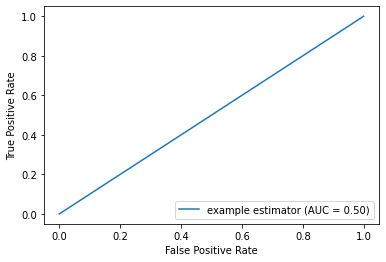

fpr: [0.     0.5001 1.    ]
tpr: [0.     0.4999 1.    ]
p_G_evaluated
[2.21612990e-18 1.64840221e-01 2.97835819e-11 ... 1.97837848e-72
 4.23758122e-04 1.86455922e+00]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    2.221352  0.809286 -1.076629 -1.054539  1.975329 -1.763675 -1.558876   
1   -0.060789  0.809584  0.184721  0.858672 -0.419055  0.014558  0.114099   
2    1.263508  0.809471 -1.079850 -1.053894 -0.062493 -1.764133 -1.544702   
3    1.446759  0.809754  0.186035 -1.053227 -0.738161  0.015183  0.112531   
4    0.119322  0.810161 -1.079658 -1.053127 -0.846406 -0.874201 -0.730752   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.462742  0.810161  0.189598  0.854599 -0.501100  0.015497  0.108745   
496  1.128380  0.809842 -1.084649 -1.056619 -0.592528  0.015087  0.113452   
497 -0.657429

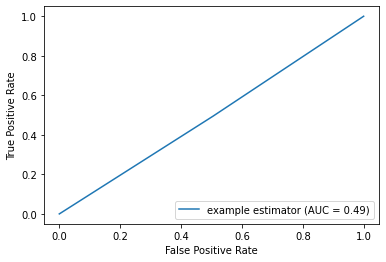

fpr: [0.     0.5053 1.    ]
tpr: [0.     0.4947 1.    ]
p_G_evaluated
[1.34149759e-08 9.14943243e-06 2.03117833e-09 ... 1.04355474e-20
 7.94831955e-07 3.14066097e-06]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    1.088972  0.809536 -1.077891  0.858950 -0.403915 -0.874202 -0.723379   
1    1.658937  0.809545  0.186081 -1.057256  1.991314  0.903737  0.112467   
2   -0.272287  0.809795 -1.078428  0.858729 -1.324748  0.015339  0.112713   
3   -0.531002  0.809920  0.186382 -1.056228  1.209820  0.015589  0.112171   
4    0.109467  0.810161 -1.078667 -1.056058 -0.883992  0.905565 -1.558876   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.405384  0.810161  0.187052 -1.058213  1.716341  0.907122  1.780410   
496 -0.754929  0.809954  0.185697 -1.057292  1.603022  1.796468  1.784551   
497  0.314453

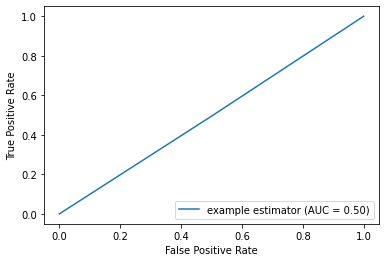

fpr: [0.     0.5028 1.    ]
tpr: [0.     0.4972 1.    ]
p_G_evaluated
[5.27857546e-10 1.25819685e-04 1.64895575e-10 ... 1.61877778e-11
 4.22356415e-06 5.43285196e-06]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    0.084864  0.809334  0.185987 -1.056748  1.882708  0.014762  0.111155   
1   -0.924609  0.809351 -1.080249  0.858690 -0.639824 -0.875049 -0.722232   
2    0.159106  0.809344  0.185598 -1.056463  1.464784  0.014885  0.112304   
3   -1.047716  0.809623  0.185523  0.859490 -1.317388  2.688709  1.782755   
4    0.067950  0.810161 -1.080296  0.859200 -0.936411  0.015106  0.110575   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.021234  0.810126  0.186653 -1.058268  0.968715  0.015508  0.111103   
496  0.082323  0.809854  3.703073  0.858536 -1.211027  0.015055  0.112006   
497  0.252019

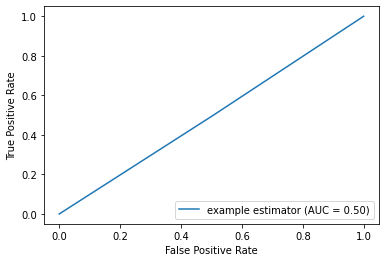

fpr: [0.     0.5034 1.    ]
tpr: [0.     0.4966 1.    ]
p_G_evaluated
[8.36789153e-13 9.44589195e-06 3.30728090e-07 ... 3.01622060e-23
 2.43787341e-06 3.18324179e-06]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.126864  0.809450  0.186278 -1.056569  1.032116 -0.874269  1.780908   
1   -0.974031 -1.234323  0.185736  0.857866 -1.098280  0.014561  0.112394   
2   -1.111469  0.809514  0.185867 -1.056228  1.185888  0.904555  1.785665   
3   -0.183664  0.809866  0.185880 -1.056470 -0.134862 -0.874112 -0.723192   
4   -0.775797 -1.231867  0.185852 -1.056125  1.082828  1.795346  1.778863   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.879392  0.810161  0.187047 -1.058429  1.839225  0.015412  0.111249   
496 -0.797757  0.809941 -1.080591  0.858611 -1.185407  0.015057 -0.722288   
497 -0.681640

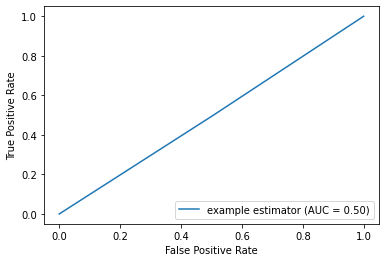

fpr: [0.     0.5034 1.    ]
tpr: [0.     0.4966 1.    ]
p_G_evaluated
[2.61785067e-11 3.24400519e-05 2.09271683e-09 ... 3.85888226e-21
 2.23962086e-06 9.41051052e-08]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.099766  0.809318  0.186309 -1.056618  1.961345  0.014922  0.111623   
1    1.711525  0.809491 -1.079636  0.858409 -0.435467 -0.875192  0.112356   
2   -0.703091  0.809435  0.186076 -1.056417  1.353429  0.904972  1.786629   
3   -0.628085  0.809824  0.185822  0.859412 -1.255439  1.795872  2.664454   
4   -1.105814 -1.232004  0.185895  0.859223 -0.254798  0.905448  1.779288   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.967889  0.810128  0.187073 -1.058223  0.598431  0.015442  0.110572   
496  0.085909  0.809841  0.185105 -1.057290  1.590784  0.015016  0.112276   
497  2.367449

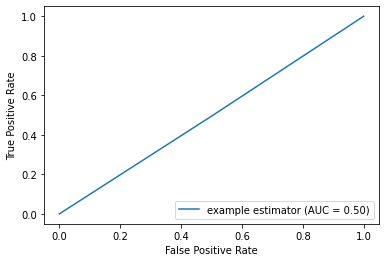

fpr: [0.     0.5028 1.    ]
tpr: [0.     0.4972 1.    ]
p_G_evaluated
[7.41632812e-13 2.98767140e-05 4.27377851e-11 ... 6.03071156e-28
 5.06841704e-06 1.67158390e-07]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0    0.111784  0.809396 -1.078507 -1.056411  1.055027 -0.874961 -0.724239   
1   -0.480181  0.809541  0.185619  0.858629 -1.074782  0.014638  0.112340   
2   -0.735876  0.809514  0.185776  0.859238 -0.793749  0.014914  0.112541   
3    0.304664  0.809816  0.185825 -1.056102  0.481834  0.015035  0.111833   
4   -1.106755  0.810161  0.185833 -1.055935 -0.289101  0.015200  0.110938   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.213794  0.810161 -1.077370  0.857737 -1.077459  0.015347  0.111044   
496 -1.138563  0.810032  0.184942 -1.056765 -0.009984 -1.762699 -1.558876   
497  0.225185

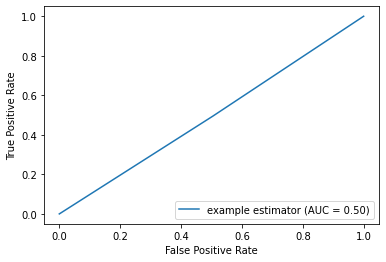

fpr: [0.     0.5049 1.    ]
tpr: [0.     0.4951 1.    ]
p_G_evaluated
[4.82727727e-08 2.80692200e-04 7.02589054e-11 ... 1.52567382e-24
 2.08697947e-05 7.51879491e-02]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.147879  0.809411  0.187751  0.860554  1.887924  0.904529  1.777147   
1   -0.478123  0.809584 -1.080442 -1.056300 -0.393768 -0.875065 -0.718940   
2   -1.166742 -1.234323  0.186094  0.861250 -1.341282  0.014955  0.115681   
3    0.321613  0.809892  0.185923  0.861791 -0.733152  0.015335  0.112569   
4   -1.077946  0.810161  0.185803  0.862225 -1.401425  0.015086  0.108339   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.952129  0.810161  0.190174 -1.061385  1.719007  1.796853  1.769286   
496 -1.177762  0.809772  0.182792  0.858488  1.456411  0.906106  1.787046   
497 -0.177802

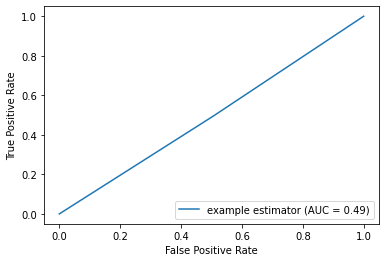

fpr: [0.     0.5055 1.    ]
tpr: [0.     0.4945 1.    ]
p_G_evaluated
[1.55954269e-11 4.53537257e-06 9.75733725e-10 ... 8.20391186e-21
 4.91983029e-06 1.69719633e-05]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -0.717057  0.809565  0.186442 -1.056110  0.301533  0.014631  0.111201   
1    0.423432  0.809687 -1.079599  0.858579 -0.495416 -1.764843 -0.722908   
2   -0.748046  0.809567  0.185684 -1.056258 -0.041073  0.014877  0.112405   
3    1.498232  0.809902  0.185995 -1.056156  1.345678 -1.763628 -1.558876   
4   -1.096708  0.810161  0.186121  0.859421 -1.362801  1.793705  0.110796   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.837385  0.810161  0.187190 -1.057809  0.221799  0.015174  0.110795   
496  0.110148  0.810041 -1.080334 -1.056827  0.112046 -0.874544 -0.723213   
497 -0.203076

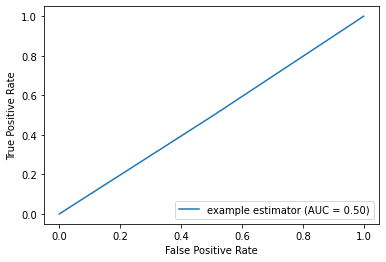

fpr: [0.     0.5039 1.    ]
tpr: [0.     0.4961 1.    ]
p_G_evaluated
[1.31929070e-09 3.05991443e-05 9.44857528e-09 ... 1.17420574e-17
 7.91534289e-07 9.94898563e-08]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.156610  0.809222  0.186280  0.858904 -0.367549  0.014963  0.111666   
1    2.644567  0.809365 -1.079437 -1.057090  0.710473 -1.764843 -1.556025   
2    1.289919  0.809374 -1.079063 -1.056278  1.307778 -1.764083 -1.555763   
3   -1.022933  0.809639  0.185980 -1.056252  1.279105  1.795494  0.112258   
4   -1.098016  0.810161  0.185899  0.859295 -0.893033 -0.874157 -0.724626   
..        ...       ...       ...       ...       ...       ...       ...   
495 -1.201599  0.810090  0.187002  0.857480 -0.486828  0.015545  0.111247   
496 -1.155436  0.809722  0.185182 -1.057143  1.449432  1.794962  1.784136   
497 -0.163094

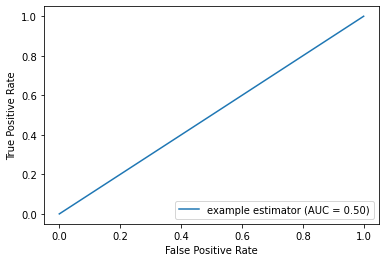

fpr: [0.     0.5002 1.    ]
tpr: [0.     0.4998 1.    ]
p_G_evaluated
[1.20501221e-11 1.43157959e-05 3.31135766e-10 ... 6.11582982e-17
 7.62477672e-06 4.49181190e-06]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.134116  0.809443  0.186342 -1.056635  0.271961  0.015071  0.111286   
1   -0.937301  0.809601 -1.079277  0.858638 -1.068770 -0.875281 -0.721949   
2    0.118676  0.809604  0.185997 -1.056402 -0.117717 -0.874729 -0.721645   
3   -0.979872 -1.233982  0.186628 -1.056405  1.497799  0.015233  0.112054   
4    0.122592  0.810161 -1.078990  0.859292 -0.267474 -0.874726 -0.725088   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.926479  0.810161 -1.077013 -1.058583  1.811798 -0.873486 -0.724287   
496 -0.785040  0.810018  0.185180  0.858475 -0.017050  0.015115  0.112254   
497 -1.052140

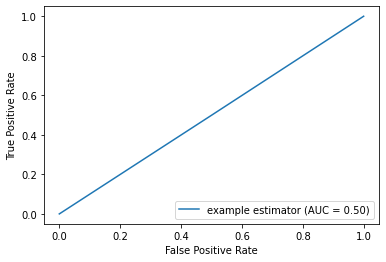

fpr: [0.     0.5005 1.    ]
tpr: [0.     0.4995 1.    ]
p_G_evaluated
[2.65142452e-10 2.75417295e-05 4.44945121e-07 ... 6.02677162e-16
 3.51763927e-06 8.36557084e-08]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -1.187270 -1.234323  1.452388 -1.056567  1.887768  0.014933  0.111589   
1   -0.893687  0.809566  0.185802  0.858526 -0.397834  1.791793  0.112492   
2   -0.756563  0.809552  0.185861  0.859119 -0.748150  1.792852  1.785351   
3   -1.012294  0.809884  0.185944  0.859402 -1.329955  0.015173  0.111942   
4   -0.781550  0.810161  0.186025 -1.056041 -0.221366  0.905050  1.772824   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.951146  0.810161 -1.077189 -1.058143  0.926140 -1.762761 -1.558876   
496 -0.820191  0.809958 -1.080486  0.858714 -1.204486  0.014940  0.112200   
497 -1.057621

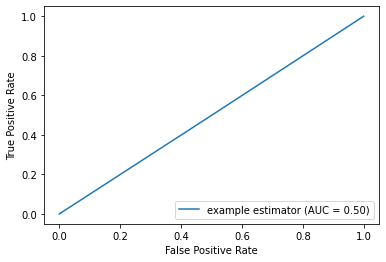

fpr: [0.     0.5008 1.    ]
tpr: [0.     0.4992 1.    ]
p_G_evaluated
[1.27646238e-14 6.55917955e-06 3.58310643e-09 ... 1.73893880e-17
 7.32793802e-06 2.51228709e-07]
p_R_evaluated
[3.02917280e-08 1.38643547e-05 7.66356232e-06 ... 2.09818721e-07
 1.27367569e-05 3.52553358e-08]
test1
Synth_set
            0         1         2         3         4         5         6  \
0   -0.793099  0.809308  0.186177  0.858822  0.229599  0.904577  1.781208   
1    0.423906  0.809472 -1.079697  0.858374  0.138158 -0.875670 -0.722261   
2   -0.736274  0.809534  0.185961 -1.056668 -0.660770  0.014643  0.112460   
3    0.276107  0.809830 -1.085012  0.858906 -0.866336 -0.874341 -0.723085   
4   -0.775073  0.810161  0.186013 -1.056360 -0.904219  0.015061  0.110740   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.413412  0.810161  0.186944  0.857411 -0.588340  0.015519  0.111085   
496 -0.808411  0.809836  0.184922  0.858466 -0.766554  0.905565  1.784620   
497 -1.076204

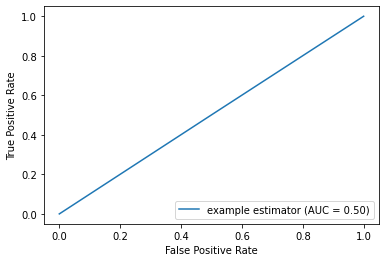

fpr: [0.     0.4995 1.    ]
tpr: [0.     0.5005 1.    ]
Iteration 1:
Training Size 10000:
Training Epoch 100: MIA Performance = {'ablated_eq1': {'accuracy': 0.4931, 'aucroc': 0.49282636}, 'ablated_eq2': {'accuracy': 0.4958, 'aucroc': 0.49334772000000005}, 'LOGAN_D1': {'accuracy': 0.5016, 'aucroc': 0.50161111}, 'MC': {'accuracy': 0.4945, 'aucroc': 0.493882485}, 'gan_leaks': {'accuracy': 0.4945, 'aucroc': 0.49452123000000003}, 'gan_leaks_cal': {'accuracy': 0.4971, 'aucroc': 0.49454245999999996}, 'LOGAN_0': {'accuracy': 0.5009, 'aucroc': 0.4978181}, 'eq1': {'accuracy': 0.4931, 'aucroc': 0.49282636}, 'domias': {'accuracy': 0.4954, 'aucroc': 0.49355669999999996}}
Training Epoch 500: MIA Performance = {'ablated_eq1': {'accuracy': 0.4942, 'aucroc': 0.49332453}, 'ablated_eq2': {'accuracy': 0.498, 'aucroc': 0.49371542999999996}, 'LOGAN_D1': {'accuracy': 0.5012, 'aucroc': 0.4997856}, 'MC': {'accuracy': 0.4937, 'aucroc': 0.49252200500000004}, 'gan_leaks': {'accuracy': 0.4937, 'aucroc': 0.49481867

In [9]:
def get_generator(
    gan_method: str = "CTGAN",
    epochs: int = 1000,
    seed: int = 0,
) -> GeneratorInterface:
    class LocalGenerator(GeneratorInterface):
        def __init__(self) -> None:
            if gan_method == "TVAE":
                syn_model = TVAESynthesizer(metadata, epochs=epochs)
            elif gan_method == "CTGAN":
                syn_model = CTGAN(epochs=epochs)
            elif gan_method == "KDE":
                syn_model = None
            else:
                raise RuntimeError()
            self.method = gan_method
            self.model = syn_model
                

        def fit(self, data: pd.DataFrame) -> "LocalGenerator":
            if self.method == "KDE":
                self.model = stats.gaussian_kde(np.transpose(data))
            else:
                self.model.fit(data)
            return self

        def generate(self, count: int) -> pd.DataFrame:
            
            if gan_method == "KDE":
                samples = pd.DataFrame(self.model.resample(count).transpose(1, 0))
            elif gan_method == "TVAE":
                samples = self.model.sample(count)
            elif gan_method == "CTGAN":
                samples = self.model.generate(count)
            else:
                raise RuntimeError()

            return samples
            
            #return self.model.sample(count)

    return LocalGenerator()


#Loading metadata from dataset for use in TVAESynthesizer
dataset = get_dataset()
df_dataset = pd.DataFrame(dataset)
df_dataset.rename(columns={0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8:'8', 9:'9', 10:'10', 11:'11', 12:'12',
                          13:'13', 14:'14', 15:'15', 16:'16', 17:'17', 18:'18', 19:'19', 20:'20', 21:'21', 22:'22', 23:'23'}, inplace = True)

from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=df_dataset)






"""
Args:
    generator: GeneratorInterface
        Generator with the `fit` and `generate` methods. The generator MUST not be fitted.
    dataset: int
        The evaluation dataset, used to derive the training and test datasets.
    training_size: int
        The split for the training (member) dataset out of `dataset`
    reference_size: int
        The split for the reference dataset out of `dataset`.
    training_epochs: int
        Training epochs
    synthetic_sizes: List[int]
        For how many synthetic samples to test the attacks.

"""

"""
CTGAN Args:

embedding_dim: int = 128,
generator_dim: Tuple = (256, 256),
discriminator_dim: Tuple = (256, 256),
generator_lr: float = 2e-4,
generator_decay: float = 1e-6,
discriminator_lr: float = 2e-4,
discriminator_decay: float = 1e-6,
batch_size: int = 500,
discriminator_steps: int = 1,
log_frequency: bool = True,
verbose: bool = False,
epochs: int = 300,
pac: int = 1,
cuda: bool = True,



"""


# mem_set_size = 1000 -> originally what training size was
reference_set_size = 10000 #held out set
training_epochs = [100, 500, 1000, 2000, 3000, 5000]
training_sizes = [10000]
#synthetic_sizes = [200]
density_estimator = "kde"  # prior, kde, bnaf
gen_size = 500 #same as synthetic_sizes

method = "TVAE"

# Create a dictionary to store the results
results = {}

# Set the number of iterations
num_iterations = 5

for iteration in range(1, num_iterations+1):
    # Initialize the result dictionary for the current iteration
    iteration_results = {}
    
    for training_size in training_sizes:
        # Initialize the result dictionary for the current training size
        size_results = {}
        
        for training_epoch in training_epochs:
            generator = get_generator(
                gan_method=method,
                epochs=training_epoch,
            )
    
            perf = evaluate_performance(
                generator,
                dataset,
                training_size,
                reference_set_size,
                training_epochs=training_epoch,
                synthetic_sizes=[gen_size],
                density_estimator=density_estimator,
            )
            
            # Store the MIA performance for the current training size and epoch
            size_results[training_epoch] = perf[gen_size]["MIA_performance"]
        
        # Store the results for the current training size
        iteration_results[training_size] = size_results
    
    # Store the results for the current iteration
    results[iteration] = iteration_results

# Print the results
for iteration, iteration_results in results.items():
    print(f"Iteration {iteration}:")
    for training_size, size_results in iteration_results.items():
        print(f"Training Size {training_size}:")
        for training_epoch, mia_performance in size_results.items():
            print(f"Training Epoch {training_epoch}: MIA Performance = {mia_performance}")
        print()


In [10]:
reference_set_size = reference_set_size
training_size = training_sizes[0]
gen_size = gen_size

epoch_output = pd.DataFrame([], columns=["iteration", "epoch", "training_size", "reference_size", "gen_size", "src", "aucroc"])

for iteration in range(1, num_iterations + 1):
    for training_epoch in training_epochs:
        epoch_res = results[iteration][training_size][training_epoch]
        perf = epoch_res  # Assuming perf is the correct value for accuracy

        for key in perf:
            epoch_output = pd.concat(
                [
                    epoch_output,
                    pd.DataFrame(
                        [
                            [iteration, training_epoch, training_size, reference_set_size, gen_size, key, perf[key]["aucroc"]]
                        ],
                        columns=["iteration", "epoch", "training_size", "reference_size", "gen_size", "src", "aucroc"],
                    ),
                ]
            )
epoch_output

,iteration,epoch,training_size,reference_size,gen_size,src,aucroc
0,1,100,10000,10000,500,ablated_eq1,0.492826
0,1,100,10000,10000,500,ablated_eq2,0.493348
0,1,100,10000,10000,500,LOGAN_D1,0.501611
0,1,100,10000,10000,500,MC,0.493882
0,1,100,10000,10000,500,gan_leaks,0.494521
...,...,...,...,...,...,...,...
0,5,5000,10000,10000,500,gan_leaks,0.495504
0,5,5000,10000,10000,500,gan_leaks_cal,0.495595
0,5,5000,10000,10000,500,LOGAN_0,0.508801
0,5,5000,10000,10000,500,eq1,0.494744


In [11]:
#results df to csv
epoch_output.to_csv('kde_epoch_output_UCI_TVAE_fix.csv')